# Feature detection

## Harris Corner detection

As always we start with the imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

To start, we will use the same checkerboard image as earlier.

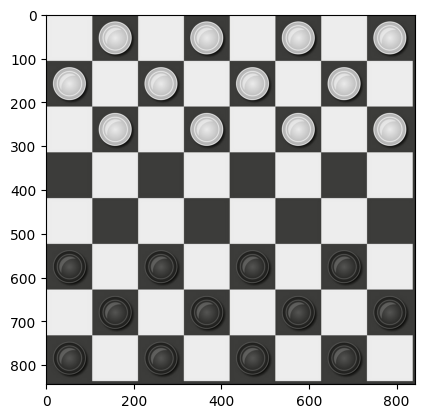

In [2]:
img = cv2.imread('checkers.png')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2a
Fill in the missing code in the next block. We would like to detect the corners of the image using the OpenCV function [`cv2.cornerHarris`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345). Afterwards we want to draw the location of the detected corners on the image and display it.

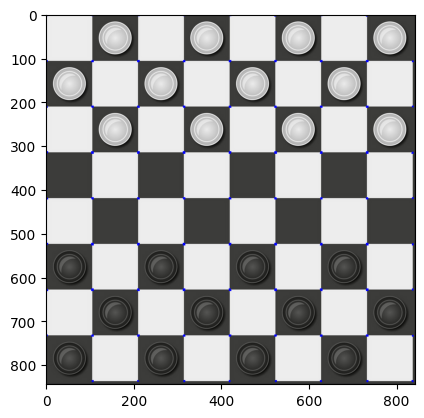

In [3]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Insert Harris Corner detector here ###
corners = cv2.cornerHarris(gray, 2, 3, 0.04)

corners = cv2.dilate(corners, None)

### Draw the detected corners in the original image here ###
img[corners > 0.01 * corners.max()] = [0, 0, 255]

# Display image
plt.imshow(img)

## Shi-Tomasi
Next we will try the Shi-Tomasi feature detection method. In OpenCV, that method is implemented as [`cv2.goodFeaturesToTrack`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541). 
Let's start with a different image this time.

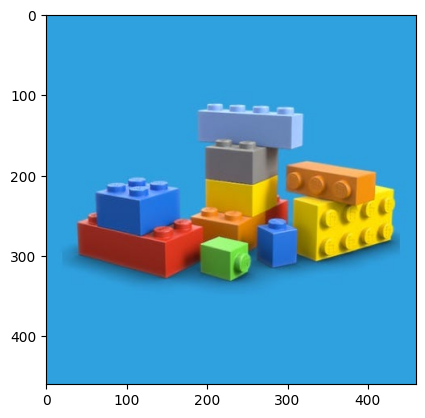

In [7]:
img = cv2.imread('Lego.jpg')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
img_org = img.copy()
plt.imshow(img)

### Exercise 2b
Just like the previous exercise, detect the corners of the image by inserting the missing code, this time using the Shi-Tomasi (good features to track) method. Draw the detected corners on the image. Check the documentation of the function for help.

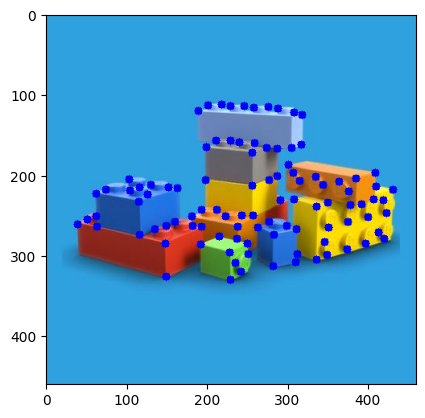

In [8]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Insert goodFeaturesToTrack detector here ###
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)

### Draw the detected corners in the original image here ###
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (int(x), int(y)), 5, (0, 0, 255), -1)

# Display image
plt. imshow(img)

### Exercise 2c
Do a Harris corner detection on the same Lego image and compare the result with the Shi-Tomasi image.

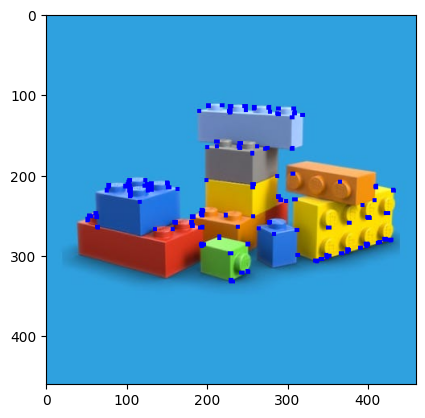

In [10]:
img = img_org.copy()

# Harris Corner detection
corners = cv2.cornerHarris(gray, 2, 3, 0.04)

corners = cv2.dilate(corners, kernel=np.ones((5,5)))

# Draw the detected corners in the original image
img[corners > 0.01 * corners.max()] = [0, 0, 255]

# Display image
plt.imshow(img)